In [ ]:
#installare geopandas
!pip install geopandas contextily

In [2]:
import geopandas as gdp
import pandas as pd
import contextily as ctx
import matplotlib.pyplot as plt

In [3]:
regioni = gdp.read_file("/content/drive/MyDrive/Colab Notebooks/Reg01012022_g (1)")
comuni = gdp.read_file("/content/drive/MyDrive/Colab Notebooks/Com01012022_g")
quartieri = gdp.read_file("/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm.zip")

1. visualizzare il geodataframe dei quartieri. Successivamente plottarlo

In [ ]:
quartieri

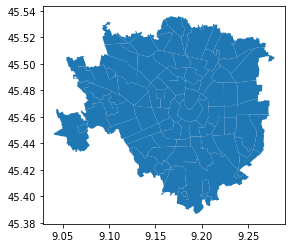

In [5]:
quartieri.plot()

2. visualizzare i primi dieci record del file delle regioni

In [ ]:
regioni.head(10)

3. visualizzare i record 10, 20, 30 del file dei comuni

In [ ]:
comuni.loc[[10, 20, 30]]

4. visualizzare il crs (cordinate reference system) del file dei quartieri

In [ ]:
quartieri.crs

**crs: 4326 (coordinate geografiche)**
**crs: 3857 (coordinate geometriche: in metri)**

5. cambiare il crs di tutti e tre i file portandolo al 3857

In [12]:
quartieri3857 = quartieri.to_crs(3857)
comuni3857 = comuni.to_crs(3857)
regioni3857 = regioni.to_crs(3857)

6. mostrare su una mappa di milano i quartieri

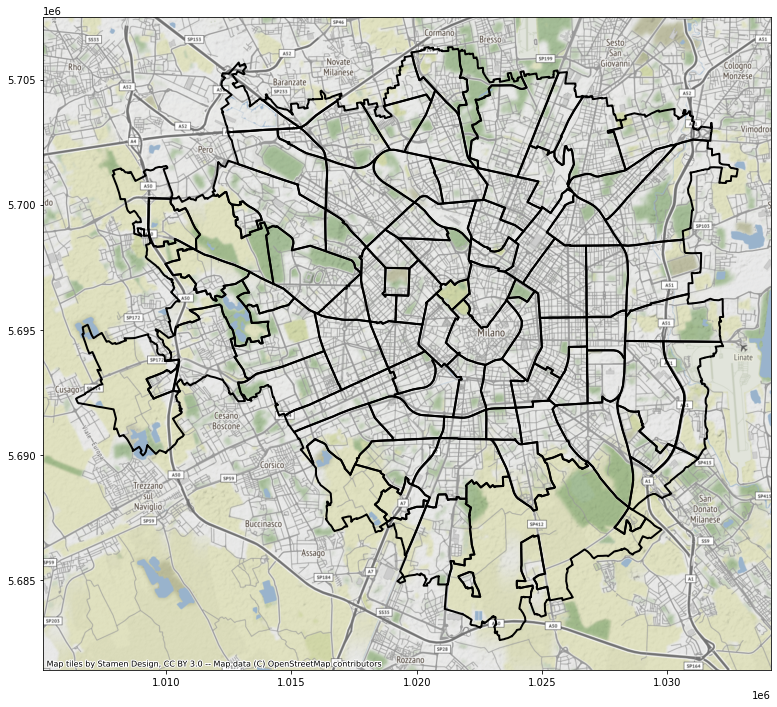

In [13]:
ax = quartieri3857.plot(figsize = (15, 12), edgecolor ="k", facecolor = "none", linewidth = 2)
ctx.add_basemap(ax)

7. trovare un comune inserito dall'utente e visualizzarlo se si trova in lombardia, altrimenti mostrare un messaggio opportuno

In [14]:
lombardia = regioni3857[regioni3857["DEN_REG"] == "Lombardia"].geometry.item()

inserisci un comune:  Saronno


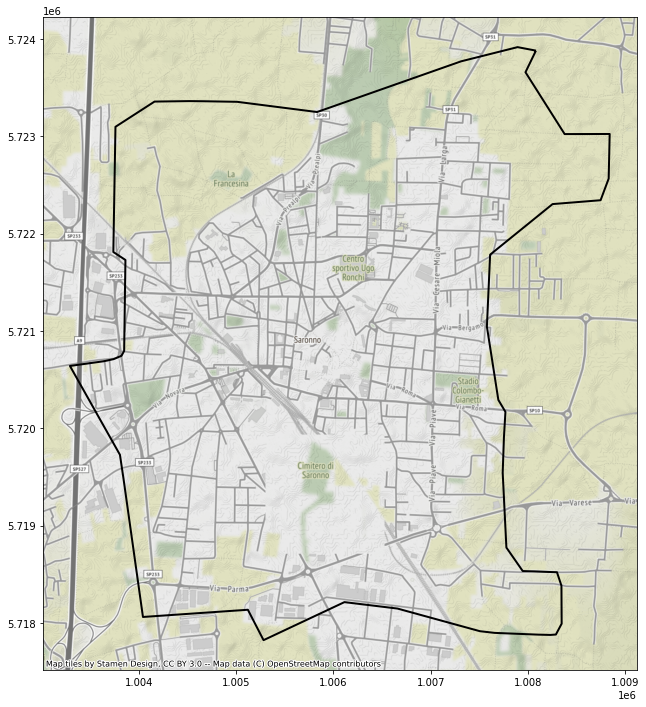

In [26]:
comune_inserito = input("inserisci un comune:  ")
comune_scelto = comuni3857[comuni3857["COMUNE"].str.contains(comune_inserito)].unary_union
comune_scelto2 = gdp.GeoSeries([comune_scelto])
if len(comuni3857[comuni3857["COMUNE"].str.contains(comune_inserito)]) > 0:
  if comune_scelto.intersects(lombardia) == True:
    ax = comune_scelto2.plot(figsize = (15, 12), edgecolor ="k", facecolor = "none", linewidth = 2)
    ctx.add_basemap(ax)
  else:
    print("comune non è in lombardia")
else:
  print("comune non esistente")

8. trovare in che quartiere si trova la Stazione Centrale

In [32]:
from shapely.geometry import Point 
Centrale = Point(9.2, 45.483333)
quartiere_centrale = quartieri[quartieri.contains(Centrale)]       #non posso usare il file quartieri3857 perché il punto, essendo in coordinate geografiche, ha un crs di 4326 (lo stesso del file quartieri)
quartiere_centrale

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
72,10,STAZIONE CENTRALE - PONTE SEVESO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7503.35172,1.556019e+06,161,"POLYGON ((9.21836 45.49970, 9.21877 45.49951, ..."


9. mostrare il quartiere della stazione centrale e il punto della stazione

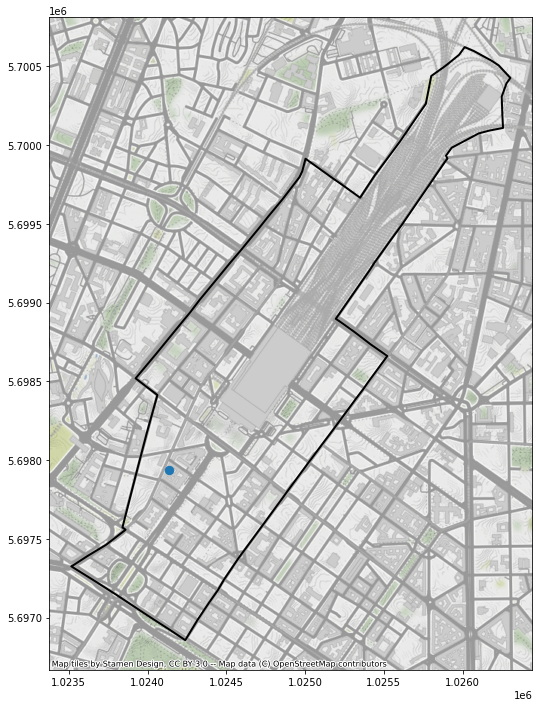

In [34]:
centrale_punto = gdp.GeoSeries([Centrale], crs= 4326).to_crs(3857)
quartiere_centrale3857 = quartiere_centrale.to_crs(3857)
ax = quartiere_centrale3857.plot(figsize = (15, 12), edgecolor ="k", facecolor = "none", linewidth = 2)
centrale_punto.plot(ax = ax, markersize = 70)
ctx.add_basemap(ax)

10. mostrare i quartieri che confinano con quello della stazione centrale

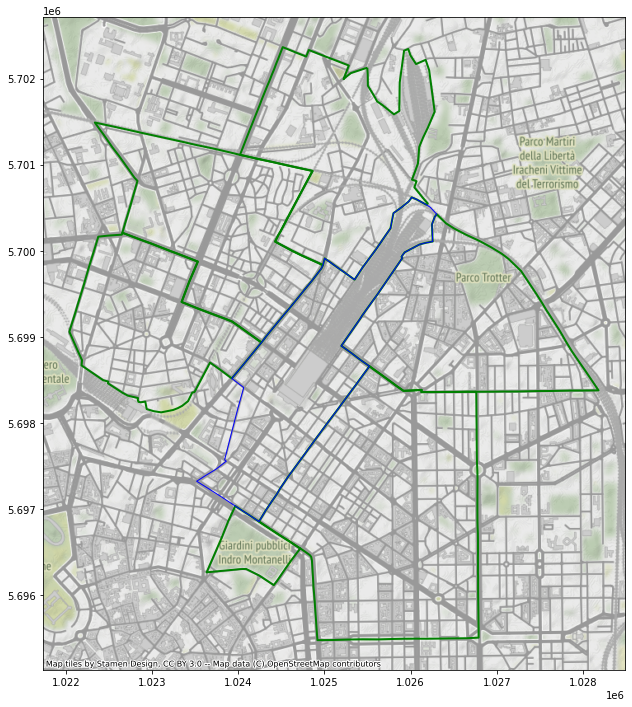

In [36]:
quartiere_centrale_oggetto = quartiere_centrale3857.geometry.item()
quartieri_vicino_centrale = quartieri3857[quartieri3857.touches(quartiere_centrale_oggetto)]
ax = quartieri_vicino_centrale.plot(figsize = (15, 12), edgecolor ="green", facecolor = "none", linewidth = 2)
quartiere_centrale3857.plot(ax = ax, edgecolor ="blue", facecolor = "none")
ctx.add_basemap(ax)